In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
x=['ab','cd']
print(list(map(list,x)))

[['a', 'b'], ['c', 'd']]


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import seaborn as sns

In [14]:
df=pd.read_csv('Main/Chicago_Crime_Detective.csv', index_col=0)

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [82]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012


In [16]:
df.shape

(191641, 9)

In [18]:
df.Year.median()

2006.0

In [28]:
list(set(df.dtypes.tolist()))

[dtype('bool'), dtype('O'), dtype('int64')]

In [30]:
df.dtypes

ID                      int64
Date                   object
LocationDescription    object
Arrest                   bool
Domestic                 bool
Beat                    int64
District               object
CommunityArea          object
Year                    int64
dtype: object

In [32]:
df.sort_values(by='Year').median()

ID          4762956.0
Arrest            0.0
Domestic          0.0
Beat           1121.0
Year           2006.0
dtype: float64

In [37]:
df.loc[95822,'Year']

2006

In [69]:
df.sort_values('Date').median()

ID          4762956.0
Arrest            0.0
Domestic          0.0
Beat           1121.0
Year           2006.0
dtype: float64

In [65]:
df.sort_values('Beat').head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
140948,2944813,9/8/03 11:15,PARKING LOT/GARAGE(NON.RESID.),False,False,111,1,32,2003
13990,8424833,1/3/12 13:30,PARKING LOT/GARAGE(NON.RESID.),False,False,111,1,28,2012
191038,1331114,1/13/01 9:00,STREET,False,False,111,NaN,NaN,2001
61639,6484512,9/6/08 23:30,STREET,False,False,111,NaN,32,2008
91262,4951508,8/28/06 0:00,STREET,False,False,111,1,28,2006


In [49]:
df[df.ID==4762956]

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
95628,4762956,5/25/06 21:00,STREET,False,False,1413,14,22,2006


In [72]:
df.Date.str.slice(0,2).min()

'1/'

In [73]:
df['Date']=pd.to_datetime(df.Date)

In [74]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012


In [75]:
df.dtypes

ID                              int64
Date                   datetime64[ns]
LocationDescription            object
Arrest                           bool
Domestic                         bool
Beat                            int64
District                       object
CommunityArea                  object
Year                            int64
dtype: object

In [91]:
df.Date.dt.weekday.max()

6

In [99]:
df.Date.dt.month[df.Arrest==True].max()

12

In [97]:
len(df[df.Arrest==True])

15536

In [98]:
len(df
   )

191641

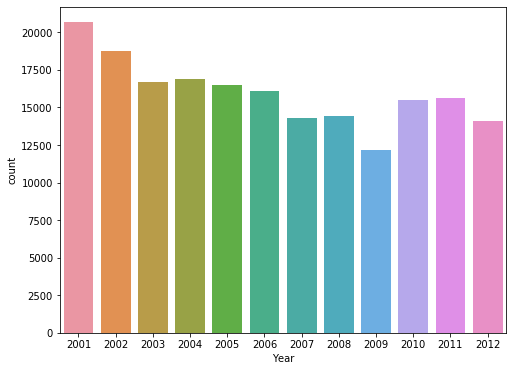

In [103]:
plt.figure(figsize=(8,6))

sns.countplot(x='Year', data=df)

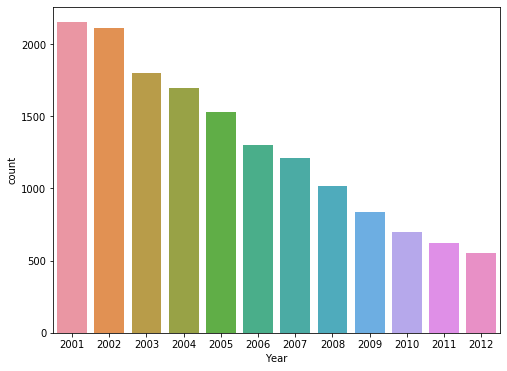

In [104]:
df_arrest=df[df.Arrest==True]


plt.figure(figsize=(8,6))

sns.countplot(x='Year', data=df_arrest)

In [107]:
df_arrest.shape

(15536, 9)

In [111]:
print(len(df_arrest[df_arrest.Year==2001])/len(df[df.Year==2001]))

0.10411727708161982


In [113]:
round(len(df_arrest[df_arrest.Year==2007])/len(df[df.Year==2007]),2)

0.08

(0, 15000)

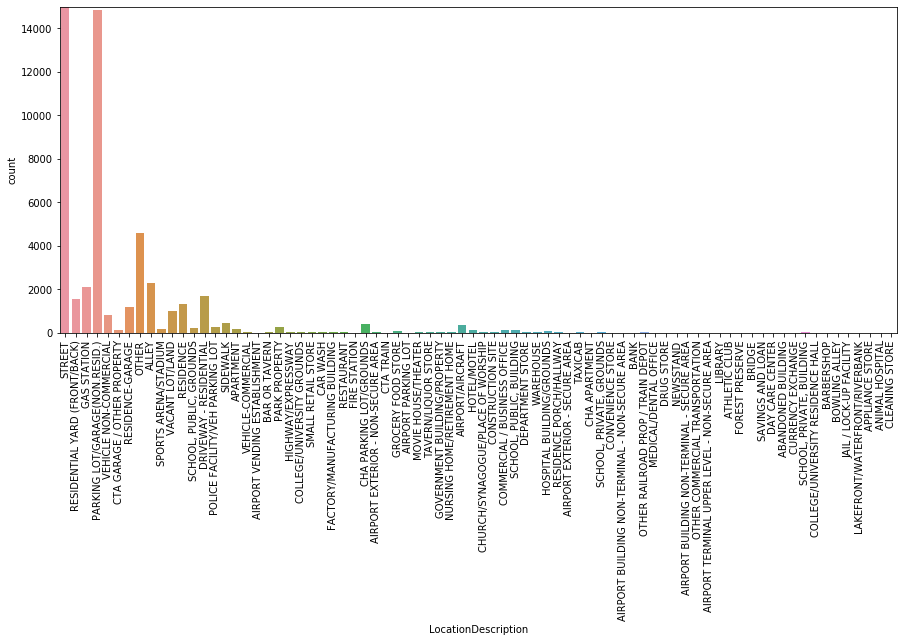

In [137]:
plt.figure(figsize=(15,6))

sns.countplot(x="LocationDescription", data=df)

plt.xticks(rotation=90)

plt.ylim(0,15000)

In [116]:
df.LocationDescription.nunique()

78

In [139]:
df.LocationDescription.value_counts().head(6)

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

In [146]:
Top5=df[df.LocationDescription.isin(['STREET','PARKING LOT/GARAGE(NON.RESID.)','ALLEY','GAS STATION','DRIVEWAY - RESIDENTIAL'])]

In [147]:
Top5.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012
5,8950793,2012-12-31 20:30:00,STREET,True,False,2521,25,19,2012


In [149]:
len(Top5)

177510

In [155]:
df[df.LocationDescription=='GAS STATION'].Date.dt.dayofweek.max()

6